In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fb-live-selling-data-analysis/__results__.html
/kaggle/input/fb-live-selling-data-analysis/clean_data_v1.0.csv
/kaggle/input/fb-live-selling-data-analysis/__resultx__.html
/kaggle/input/fb-live-selling-data-analysis/__notebook__.ipynb
/kaggle/input/fb-live-selling-data-analysis/__output__.json
/kaggle/input/fb-live-selling-data-analysis/custom.css
/kaggle/input/fb-live-selling-data-analysis/__results___files/__results___41_1.png
/kaggle/input/fb-live-selling-data-analysis/__results___files/__results___51_1.png
/kaggle/input/fb-live-selling-data-analysis/__results___files/__results___52_1.png
/kaggle/input/fb-live-selling-data-analysis/__results___files/__results___21_1.png
/kaggle/input/sample-data-for-kmeans/ex7_X.npy


In [4]:


# function to find the closest centroid
def find_closest_centroids(dataset,initial_centroids):
    """
     Computes the centroid memberships for every example
    
    Args:
        dataset (ndarray): (m, n) Input values      
        initial_centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
        
    # getting the number of centroids given initially
    K=initial_centroids.shape[0]  
    
    #defining a list which will show the nearest centroid for each example of the dataset
    idx=np.zeros(dataset.shape[0],dtype=int)
    temp_ij=np.zeros(initial_centroids.shape[0])
    #looping through entire dataset
    for i in range(dataset.shape[0]):
        for j in range(initial_centroids.shape[0]):
            temp=np.linalg.norm(dataset[i]-initial_centroids[j])
            temp_ij[j]=temp
        idx[i]=np.argmin(temp_ij)
        
    return idx    
            
    
    
    
    
    


Functions for printing the plots 

In [5]:
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # Define colormap to match Figure 1 in the notebook
    cmap = ListedColormap(["red", "green", "blue"])
    c = cmap(idx)
    
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)


def plot_kMeans_RGB(X, centroids, idx, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()


def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

**Data Analysis**

In the below code block we are planning to upload and visualise the data.

The shape of the input data is (300, 2)
The first five values of the dataset is 
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]


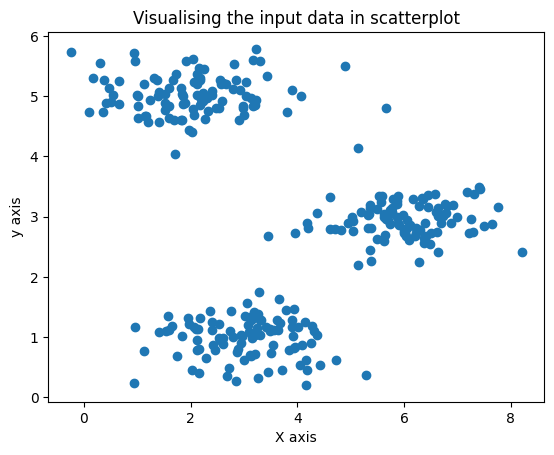

In [6]:
X = np.load("/kaggle/input/sample-data-for-kmeans/ex7_X.npy")
print(f'The shape of the input data is {X.shape}')

print("The first five values of the dataset is \n",X[:5])

plt.scatter(X[:,0],X[:,1])
plt.title("Visualising the input data in scatterplot")
plt.xlabel("X axis")
plt.ylabel("y axis")
plt.show()

In [7]:
# Select an initial set of centroids (3 Centroids) for testing
initial_centroids = np.array([[3,3], [6,2], [8,5]])



# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

for i in range(5):
    print(f'The closest centroid for the examples {i}-- {X[i]} is  {idx[i]}')

The closest centroid for the examples 0-- [1.84207953 4.6075716 ] is  0
The closest centroid for the examples 1-- [5.65858312 4.79996405] is  2
The closest centroid for the examples 2-- [6.35257892 3.2908545 ] is  1
The closest centroid for the examples 3-- [2.90401653 4.61220411] is  0
The closest centroid for the examples 4-- [3.23197916 4.93989405] is  0


**Computing centroid means**

A function `compute_centroids` is used to recompute the value for each centroid

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$



In [8]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # creating a list to store values 
    centroids = np.zeros((K, n))
    temp=[]
    
    for j in range(K):
        temp=X[idx==j]
        centroids[j]=np.mean(temp,axis=0)
            
                
    return centroids

 **Defining K-Means algorithm**

In [9]:
def kMeans_func(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

**Code to randomly select the initial cendroid points**


In [10]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    print(randidx[:K])
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

**Running the k-means algorithm**


[ 25 210 258]
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


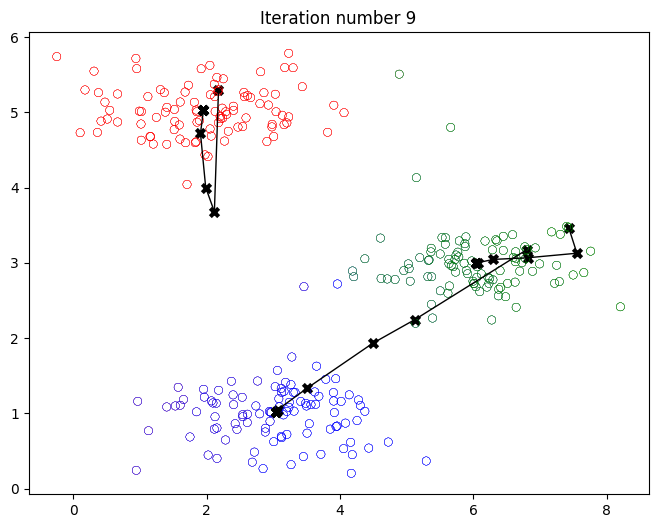

In [11]:
# Number of iterations
max_iters = 10
k=3  # Select an initial set of centroids (3 Centroids)
initial_centroids =kMeans_init_centroids(X,k)

# Run K-Means
centroids, idx = kMeans_func(X, initial_centroids, max_iters, plot_progress=True)

# Implementing the K-means clustering using Sklearn

In [29]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=2, random_state=0,n_init=10)
kmeans.fit(X)    #to find the cluster centroids and assign each data point to the nearest centroid




KMeans(n_clusters=2, n_init=5, random_state=0)

The centroid coordinates after fitting the k-means algorithm is shown below

In [30]:
kmeans.cluster_centers_

array([[1.98363152, 5.03043004],
       [4.52205549, 1.9806849 ]])

**Calculating the inertia of the clustering**

Inertia measures the sum of squared distances of samples to their closest cluster center. Lower inertia indicates that the points within each cluster are closer to their centroid, suggesting tighter and more compact clusters, which is desirable in most clustering tasks

In [22]:
kmeans.inertia_    #n_clusters=2

913.3192714747092

* The lesser the model inertia, the better the model fit.

* We can see that the model has very high inertia. So, this is not a good model fit to the data.

# Use elbow method to find optimal number of clusters




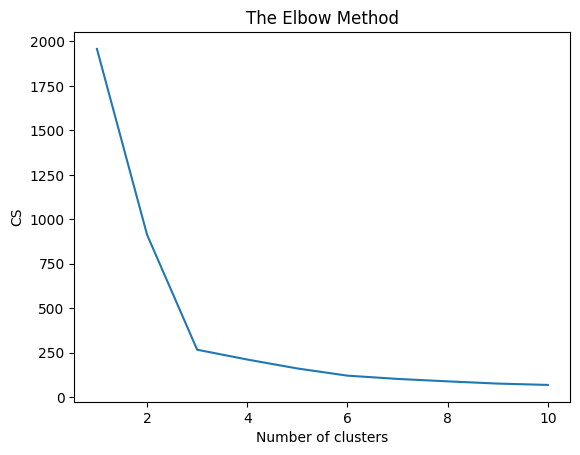

In [23]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

* By the above plot, we can see that there is a kink at k=3.

* Hence k=3 can be considered a good number of the cluster to cluster this data.
 


# K means with n_cluster=3

In [34]:


kmeans= KMeans(n_clusters=3, random_state=0,n_init=10)
kmeans.fit(X)    #to find the cluster centroids and assign each data point to the nearest centroid


print(f' The centroids calculated using SKlearn are \n{kmeans.cluster_centers_} \n\n\n The centroids calculated using the numpy method are \n {centroids}' )


 The centroids calculated using SKlearn are 
[[3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]] 


 The centroids calculated using the numpy method are 
 [[1.95399466 5.02557006]
 [6.03366736 3.00052511]
 [3.04367119 1.01541041]]
